In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical 
from sklearn.model_selection import train_test_split

#POBRANIE NASZYCH DANYCH
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
X_train = (train_df.drop(columns= ['label'])).values

#Rzeczywiste wartości cyfr
y_train = train_df['label'].values
X_train = X_train.reshape((42000,28,28))  #Tworzymy macierz 28x28 z ktorej powstanie obraz  

#Przeobienie testowych wartości
X_test = test_df.values
X_test = X_test.reshape((28000, 28,28))

#Normalizujemy zeby miec wrtości wejsciowe z zakresu (0,1)
X_train = X_train /  255
X_test =  X_test /  255


Using TensorFlow backend.
C:\Users\dawid\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\dawid\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\dawid\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\dawid\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [3]:
#dzielimy nasze dane na dwa zbiory 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [4]:
X_train = X_train.reshape(X_train.shape[0],28*28)
X_val = X_val.reshape(X_val.shape[0], 28*28)
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)

In [5]:
def create_model():
  model = Sequential()
  model.add(Dense(100, input_dim = 28*28, activation = 'relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(20, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])  
  return model

In [6]:
model = create_model()

In [7]:
trening = model.fit(X_train, y_train, validation_split=0.1, epochs=15, batch_size=1000)


Train on 28350 samples, validate on 3150 samples
Epoch 1/15
28350/28350 [==============================] - 1s 42us/step - loss: 0.7584 - accuracy: 0.7590 - val_loss: 0.3083 - val_accuracy: 0.9063
Epoch 2/15
28350/28350 [==============================] - 1s 25us/step - loss: 0.2205 - accuracy: 0.9340 - val_loss: 0.2085 - val_accuracy: 0.9384
Epoch 3/15
28350/28350 [==============================] - 1s 24us/step - loss: 0.1472 - accuracy: 0.9557 - val_loss: 0.1698 - val_accuracy: 0.9505
Epoch 4/15
28350/28350 [==============================] - 1s 26us/step - loss: 0.1057 - accuracy: 0.9684 - val_loss: 0.1703 - val_accuracy: 0.9511
Epoch 5/15
28350/28350 [==============================] - 1s 27us/step - loss: 0.0857 - accuracy: 0.9742 - val_loss: 0.1602 - val_accuracy: 0.9527
Epoch 6/15
28350/28350 [==============================] - 1s 24us/step - loss: 0.0675 - accuracy: 0.9787 - val_loss: 0.1486 - val_accuracy: 0.9587
Epoch 7/15
28350/28350 [==============================] - 1s 26us/st

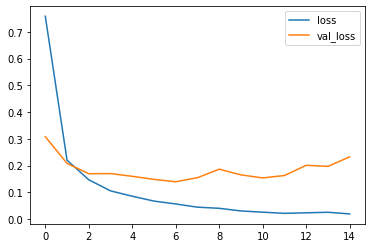

In [8]:
#Tworzymy wykresy aby zobaczyć jak rosła nasza skuteczność i malała niedokładność
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

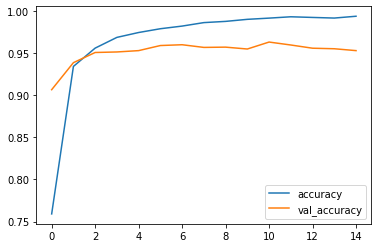

In [9]:
accuracy = pd.DataFrame(model.history.history)
accuracy[['accuracy','val_accuracy']].plot()

In [10]:
#Korzystamy z naszega szkolenia, do zidentyfikowania naszego zestawu testowego 
X_test1 = X_test.reshape(X_test.shape[0], 784) 
predictions = model.predict_classes(X_test1)
results = model.predict(X_test1) 

[4.7760297e-16 3.2142037e-15 1.0000000e+00 5.0587220e-13 7.6855819e-20
 1.2755367e-21 6.0184334e-14 3.4078465e-10 1.1882764e-16 1.5500009e-22]
2


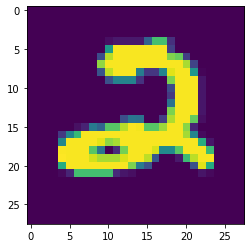

In [11]:
#Sprawdźimy teraz kilka przypadków
print(results[0])
print(predictions [0])
plt.imshow(X_test[0])

[8.5553075e-12 4.7142095e-09 7.0963027e-13 3.5910398e-07 9.5906101e-09
 2.3533706e-09 2.5751429e-11 4.8800518e-07 1.7212669e-09 9.9999917e-01]
9


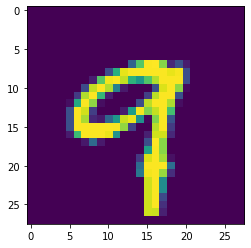

In [12]:
print(results[20])
print(predictions [20])
plt.imshow(X_test[20])

[2.8281547e-11 9.2329720e-12 1.0388636e-05 6.2479222e-09 1.9318947e-16
 4.6832981e-17 2.0025951e-11 9.9998963e-01 1.3007266e-12 2.2356398e-13]
7


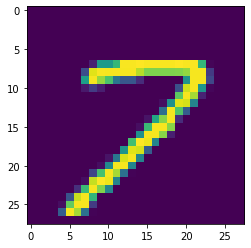

In [13]:
print(results[30])
print(predictions [30])
plt.imshow(X_test[30])

In [14]:
dane = {'Wyniki':predictions}

In [15]:
df = pd.DataFrame(data = dane)

In [16]:
df

,Wyniki
0,2
1,0
2,9
3,4
4,3
...,...
27995,9
27996,7
27997,3
27998,9


In [17]:
#sprawdzamy niektóre błedy 
check = (train_df.drop(columns= ['label'])).values
learned_value = model.predict_classes(check)

In [18]:
X_train1 = X_train.reshape(X_train.shape[0], 784) 
real_value = train_df['label'].values
images = check.reshape((42000,28,28))

In [19]:
#Tworzymy funkcje które obliczą ile cyfr źle rozpoznał komputer z tych ktróre wartosci znalizmy od poczatku
number_errors = 0 

for i in range(42000): 
    if learned_value[i] != real_value[i]:
        number_errors = number_errors + 1
effectiveness = ((42000-number_errors)/42000)*100
print('Siec poprawnie rozpoznała ' + str(effectiveness) + ' % ')

Siec poprawnie rozpoznała 98.05952380952381 % 


In [20]:
# Tworzymy funkcje ktora znajduje cyfry źle rozpoznane 
import random
show_error = 0 
computer_errors =[]
real_value_errors =[]
images_errors = []
for i in range(42000): 
    if learned_value[i] != real_value[i]:        
        computer_errors.append(learned_value[i]),
        real_value_errors.append(real_value[i]),
        images_errors.append(images[i])

nauczona wartość: 8
rzeczywista wartość: 1


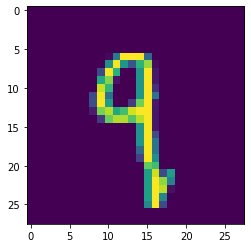

In [21]:
#pokazemy kilka błedow
print('nauczona wartość: ' + str(computer_errors[0]))
print('rzeczywista wartość: ' + str(real_value[0]))
plt.imshow(images_errors[0])

nauczona wartość: 2
rzeczywista wartość: 7


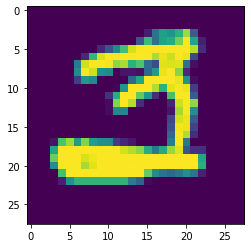

In [22]:
print('nauczona wartość: ' + str(computer_errors[6]))
print('rzeczywista wartość: ' + str(real_value[6]))
plt.imshow(images_errors[6])

nauczona wartość: 7
rzeczywista wartość: 0


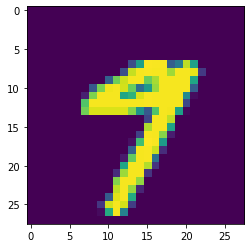

In [23]:
print('nauczona wartość: ' + str(computer_errors[1]))
print('rzeczywista wartość: ' + str(real_value[1]))
plt.imshow(images_errors[1])

In [24]:
result = pd.DataFrame({'ImageId': np.arange(1,len(predictions)+1),'Label' : predictions})

In [25]:
result.to_csv(os.getcwd() + '/results.csv',index=False)